# **Hasbi Thaufik Oktodila**
# Talent Fair Challenge: Aria Dataset

Linkedin: http://linkedin.com/in/hasbithaufik/ <br>

Deployment link: [Link](https://huggingface.co/spaces/hasbithaufik/hto_app)

# **Introduction**

Nama saya Hasbi Thaufik Oktodila, alumni Data Science Bootcamp Hacktiv8 HCK-002. Notebook ini Adalah project machine learning menggunakan dataset yang disediakan Aria dalam memprediksi hasil oemberian nutrisi kepada target.

Notebook overview:

Notebook terdiri dari:
1. Data Loading<br>
Import data untuk diproses
2. Data Cleaning<br>
Melakukan pengecekan nilai null, duplicate, dan mempersiapkan data untuk diproses
3. Exploratory Data Analysis<br>
Analisis Data
  Melakukan univariate analysis dan bivariate analysis
4. Feature Engineering<br>
Mempersiapkan data untuk melakukan modeling
5. Modeling<br>
Modeling dilakukan menggunakan AutoML AutoSklearn.
6. Model Evaluation<br>
Untuk mengevaluasi model regresi, digunakan Metriks MAE dan RMSE

# **Data Information**

`target` contained information to predict plant nutrition<br>
`V1` - `V8` contained information about variable to predict plant nutrition<br>
`sample_type` contained information about 2 different labs sample obtained

# **Importing Libraries**

In [1]:
# Libraries
import pandas as pd   # dataframe processing
import numpy as np    # mathematical processing
import matplotlib.pyplot as plt # visualisasi
import seaborn as sns           # visualisasi

# Settings
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings(action='ignore')  

# **Loading the Dataset**

Import dataset untuk diproses dan menampilkannya.

In [2]:
df = pd.read_excel('aria_data.xlsx', sheet_name='dataset')
df

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1
...,...,...,...,...,...,...,...,...,...,...
155,4.83,573.250000,361.250000,643.125000,489.812500,666.875000,355.250000,712.312500,3943.687500,lab 2
156,4.47,678.375000,398.125000,678.250000,541.125000,704.000000,393.500000,788.812500,3928.187500,lab 2
157,4.63,634.000000,382.866667,657.466667,505.066667,719.200000,366.600000,792.133333,3861.200000,lab 2
158,4.35,615.312500,366.750000,642.937500,483.687500,675.625000,359.062500,730.125000,3859.062500,lab 2


# **Data Cleaning**

Melihat informasi data seperti nilai null dan tipe data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


In [4]:
df.isnull().any()

target         False
v1             False
v2             False
v3             False
v4             False
v5             False
v6             False
v7             False
v8             False
sample_type    False
dtype: bool

In [5]:
df.duplicated().any()

False

Setelah dilakukan pengecekan singkat, tidak ada nilai null dan duplikat. Proses dilanjutkan mengubah value `lab 1` dan `lab 2` menjadi `1` dan `2` untuk mempermudah pemrosesan data.

In [6]:
df['sample_type'] = df['sample_type'].replace({'lab 1': 1, 'lab 2': 2})

# **Exploratory Data Analysis**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c383e7ca0>,
      dtype=object)

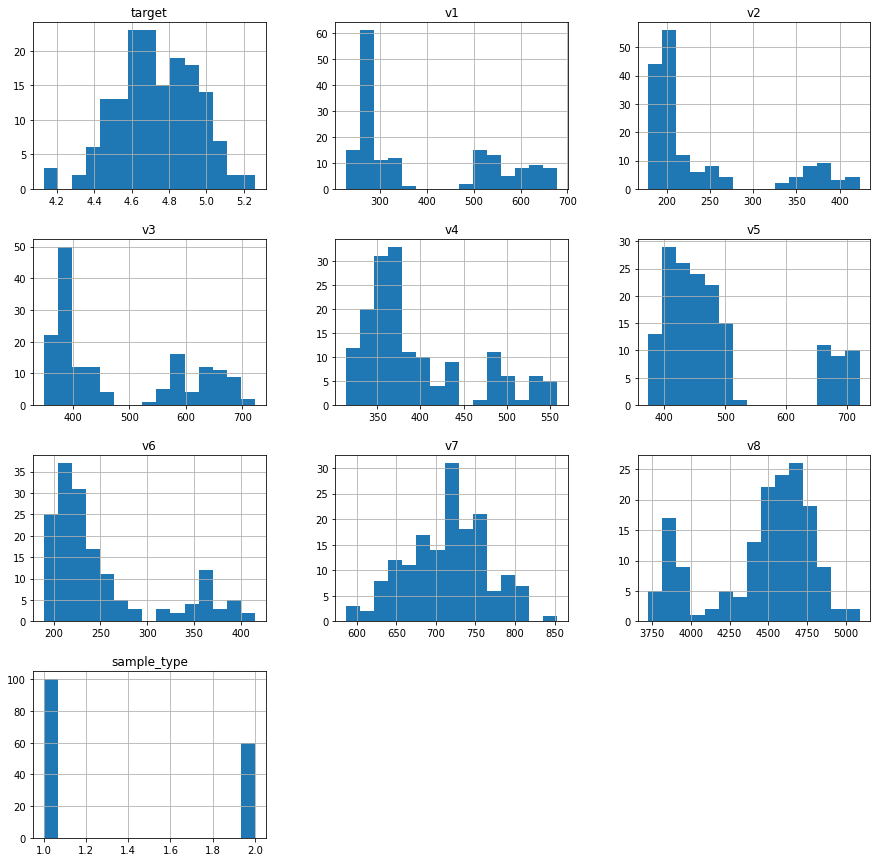

In [7]:
df.hist(figsize = (15,15), bins=15)

**Insight**

- Dari `sample_type`, lab1 memiliki data yang lebih banyak dibandingkan lab2 (100:60)
- Hal yang menarik adalah pada data v1, v2, v3, v4, v5, v6 yang seperti memiliki dua kelompok persebaran.
- v1 memiliki kelompok persebaran <400 dan >400
- v2 memiliki kelompok persebaran <300 dan >300
- v3 memiliki kelompok persebaran <500 dan >500
- v4 memiliki kelompok persebaran <450 dan >450
- v5 memiliki kelompok persebaran <600 dan >600
- v6 memiliki kelompok persebaran <300 dan >300

- Golongan nutrisi v1-v6 memiliki treatment yang menarik karena ada interval yang kosong yang seakan-akan terbagi menjadi 2 kluster. Hal ini akan dianalisis lebih dalam pada bivariate analysis.

In [8]:
print('V1 mean =', df['v1'].mean())
print('V2 mean =', df['v2'].mean())
print('V3 mean =', df['v3'].mean())
print('V4 mean =', df['v4'].mean())
print('V5 mean =', df['v5'].mean())
print('V6 mean =', df['v6'].mean())
print('V7 mean =', df['v7'].mean())
print('V8 mean =', df['v8'].mean())

V1 mean = 389.8924368212196
V2 mean = 237.44267733134902
V3 mean = 480.57304139254376
V4 mean = 394.1096222326648
V5 mean = 487.316519684628
V6 mean = 251.45082021459885
V7 mean = 714.7379264567667
V8 mean = 4456.91323347431


**Insight**

V8 memiliki rata-rata dosis paling tinggi, diikuti v7, v5, c3, v4, v1, v2, dan v6.

Dapat disimpulkan V8 merupakan nutrisi yang paling dibutuhkan jika didasarkan dalam percobaan ini

**Menggolongkan data kategoris dan numerikal**

In [11]:
categoricals = ['sample_type']
numericals = ['v1','v2','v3','v4','v5','v6','v7','v8', 'target']

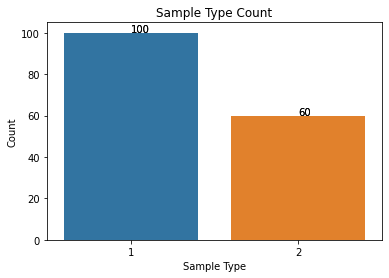

<Figure size 216x216 with 0 Axes>

In [12]:
# create a bar plot
sns.countplot(data=df, x='sample_type')

ax = sns.countplot(data=df, x='sample_type')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.4, p.get_height()+0.1))

# set the title and labels
plt.title('Sample Type Count')
plt.xlabel('Sample Type')
plt.ylabel('Count')

plt.figure(figsize=(3, 3))

# show the plot
plt.show()

**Melakukan Bivariate analysis untuk melihat relasi `sample_type` dan nutrisi**

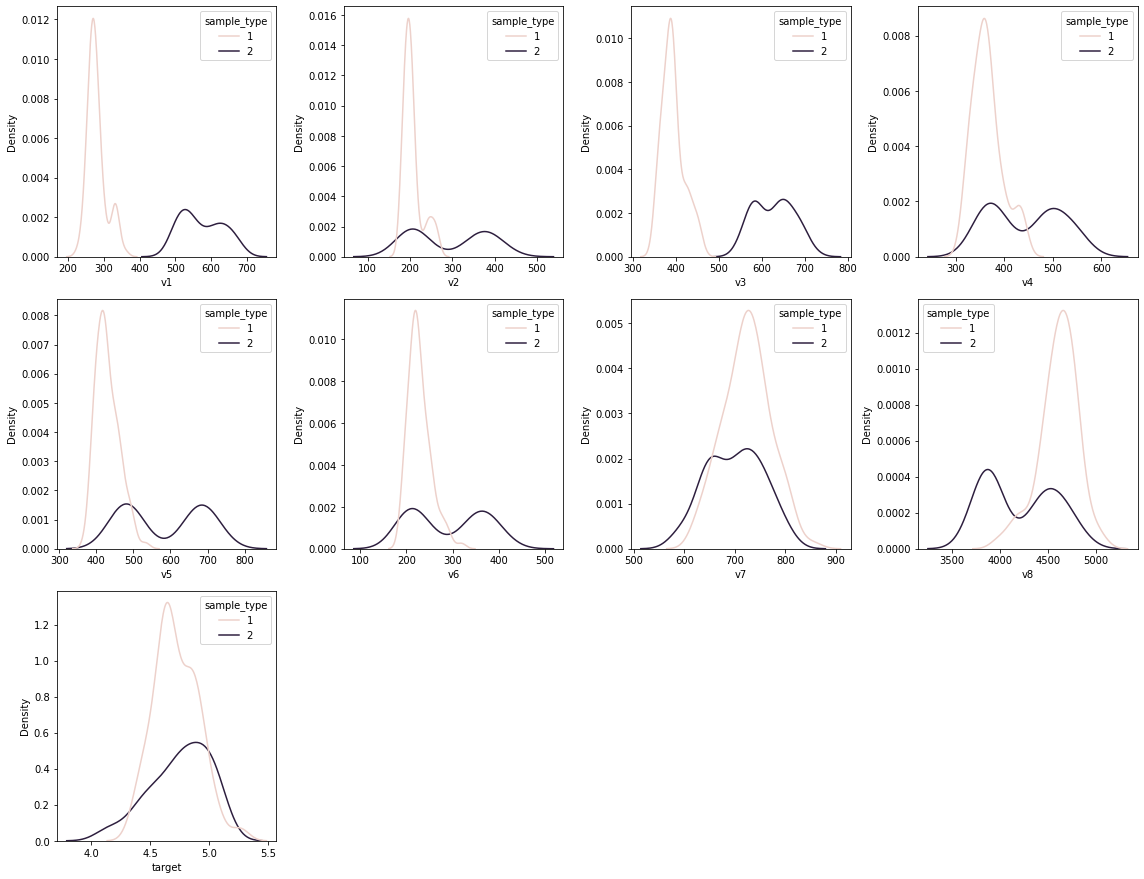

In [13]:

cols = 4
rows = 5
num_cols = df[numericals].columns
fig = plt.figure( figsize=(cols*4, rows*4))

for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.kdeplot(x = df[col], hue=df['sample_type'], ax = ax)
    
fig.tight_layout()  
plt.show()

**Insight**

Dari plot di atas, dapat ditemukan beberapa insight tentang relasi lab.

- v1  dan v3 memiliki relasi yang unik karena dosis terbagi berdasarkan `sample_type`<br>
    Dalam nutrisi v1, lab1 menangani dosis < 400, dan lab 2 menangani dosis > 400 <br>
    Dalam nutrisi v3, lab1 menangani dosis < 500, dan lab 2 menangani dosis > 500

- Jika dilihat dari v1 - v6, lab 2 memiliki dosis yang lebih tinggi ketimbang lab 2. Hal ini bisa dilihat karena lab 1 hanya memiliki treshold tertentu dimana setelah treshold tersebut, kategori masuk ke lab 2.

- Hanya saja, untuk ukuran densitas (banyaknya data), sample `lab 1` memiliki data yang lebih banyak. Bisa disimpulkan, sample `lab 1` merupakan tipe sample yang lebih banyak ditemui, yakni sample yang memiliki dosis rendah dibandingkan lab 2 (untuk nutrisi-nutrisi tertentu)

- Karena `sample_type` sudah dapat direpresentasikan melalui dosis v1-v6, Berdasarkan hal ini, kolom `sample_type` akan didrop dari feature pemodelan karena perbedaan dosis nutrisi v1-v6 akan lebih signifikan karena data berupa numerikal, bukan kategorikal.

**Untuk melihat perbandingan relasi antar `sample_type` dan `target`, kita akan melihat mean, max, dan min dari setiap `sample_type`

In [45]:
dflab1 = df[df['sample_type']==1]
dflab2 = df[df['sample_type']==2]

print('**** Sample Type -- Target Comparison ****')
print(' ')
print('---- LAB 1 ----')
print('Rata-rata : ', dflab1['target'].mean())
print('Max       : ', dflab1['target'].max())
print('Min       : ', dflab1['target'].min())

print(' ')
print('---- LAB 2 ----')
print('Rata-rata : ', dflab2['target'].mean())
print('Max       : ', dflab2['target'].max())
print('Min       : ', dflab2['target'].min())

**** Sample Type -- Target Comparison ****
 
---- LAB 1 ----
Rata-rata :  4.7219999999999995
Max       :  5.26
Min       :  4.359999999999999
 
---- LAB 2 ----
Rata-rata :  4.753333333333333
Max       :  5.109999999999999
Min       :  4.13


Jika dilihat insight ini dengan insight yang sebelumnya, terlihat bahwa lab 2 dan lab 1 tidak terlalu memiliki perbedaan yang signifikan.

Karena lab 1 dan lab 2 memiliki perbedaan dari segi dosis, maka hal yang mempengaruhi bukan banyak/sedikitnya dosis, tapi lebih kepada kombinasi dosis antar nutrisi.

Langkah selanjutnya akan dilanjutkan untuk melihat korelasi antar nutrisi, serta nutrisi dan target.

**Untuk mencegah data-leak saat melakukan kalkulasi korelasi, data akan dilakukan split terlebih dahulu**

# **Data Splitting**

In [15]:
from sklearn.model_selection import train_test_split

df = df.sample(n=len(df), replace=False) # data diacak terlebih dahulu

X = df[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']] # pilih variabel fitur, sample_type sudah didrop
y = df['target'] # pilih variabel target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train Shape:')
print(X_train.shape)
print(y_train.shape)
print('-------------')
print('Test Shape:')
print(X_test.shape)
print(y_test.shape)


Train Shape:
(128, 8)
(128,)
-------------
Test Shape:
(32, 8)
(32,)


In [16]:
y_train_df = pd.DataFrame(y_train, columns=['target'])
dftrain = pd.concat([X_train, y_train_df], axis=1)
dftrain 

,v1,v2,v3,v4,v5,v6,v7,v8,target
32,272.066667,181.066667,348.933333,313.733333,373.333333,201.133333,626.266667,4142.800000,4.57
144,652.666667,410.466667,687.533333,552.866667,714.733333,389.266667,757.666667,3883.533333,4.65
80,290.733333,211.400000,386.400000,361.600000,421.666667,236.333333,725.000000,4557.866667,4.45
149,597.733333,370.666667,670.266667,484.800000,674.666667,357.466667,746.066667,3892.933333,4.69
13,280.866667,197.400000,374.666667,339.266667,407.866667,212.333333,716.266667,4624.000000,4.66
...,...,...,...,...,...,...,...,...,...
71,286.687500,185.250000,371.125000,342.625000,409.500000,212.437500,697.812500,4431.437500,4.88
115,552.875000,211.812500,574.812500,366.375000,465.812500,201.687500,651.000000,4428.312500,4.98
9,268.266667,178.800000,370.000000,342.466667,384.533333,204.733333,690.333333,4255.200000,4.72
130,663.375000,422.812500,722.312500,541.750000,721.000000,415.375000,738.125000,3836.812500,4.89


**Melakukan pengecekan outlier melalui boxplot**

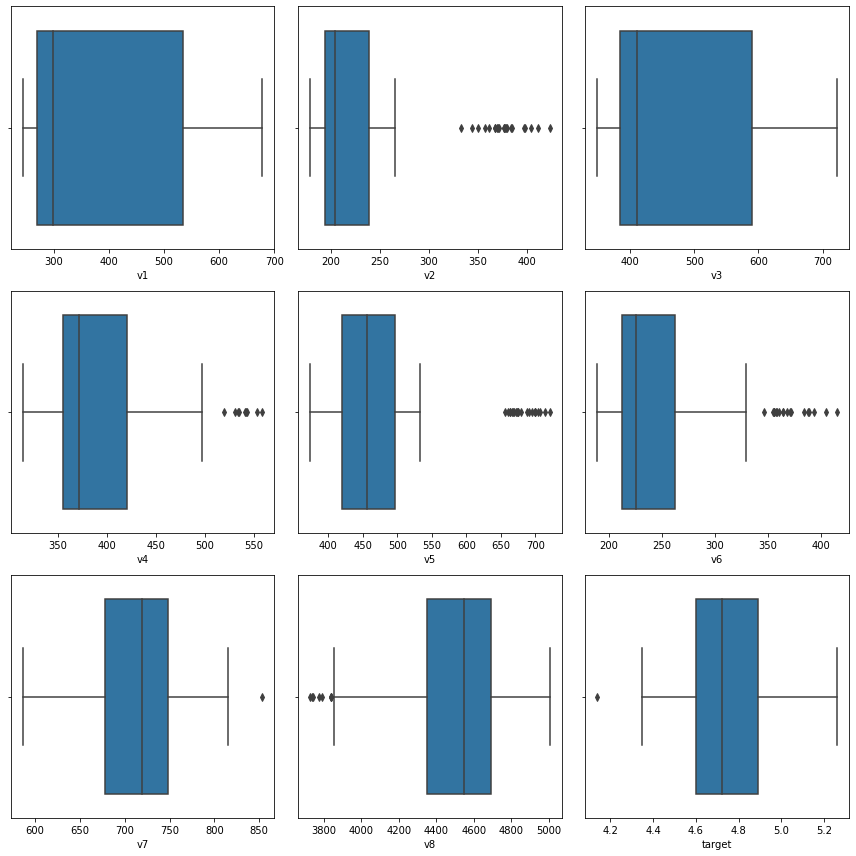

In [17]:
cols = 3
rows = 3
num_cols = dftrain[numericals].columns
fig = plt.figure( figsize=(cols*4, rows*4))

for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.boxplot(x = dftrain[col], ax = ax)
    
fig.tight_layout()  
plt.show()

Terlihat ada beberapa outlier dari visualisasi boxplot. Hanya saja, outlier disini sangat tidak baik untuk didrop karena ada hal yang merepresentasikan `sample_type` lab 2.

contohnya saja, pada v2, dosis >300 dikategorikan ke outlier, padahal, untuk dosis 300 ke atas hanya ada pada kategori lab 2.

Berdasarkan hal ini, outlier tidak akan ditangani karena akan mengurangi informasi data (ditambah data yang juga tergolong sedikit)

**langkah selanjutnya, melakukan pengecekan outlier menggunakan metode IQR**

In [18]:
def outlier_analysis(dftrain,col):
  skewness = dftrain[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = dftrain[col].mean() + 3*dftrain[col].std()
    lower = dftrain[col].mean() - 3*dftrain[col].std()
  else:
    Q1 = dftrain[col].quantile(0.25)
    Q3 = dftrain[col].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + (3 * IQR)
    lower = Q1 - (3 * IQR)

  no_outliers = dftrain[(dftrain[col]>=lower) &  (dftrain[col]<=upper)]
  outliers = dftrain[(dftrain[col]<lower) | (dftrain[col]>upper)]

  return outliers,no_outliers, upper, lower

cols_name = numericals

for i in cols_name:
    out,no_out, up, low = outlier_analysis (dftrain,i)
    print('-'*20)
    print(i)
    print('count of outlier: ', len(out))
    print('percentage of outlier: ', (len(out)/len(dftrain))*100, '%') 

--------------------
v1
count of outlier:  0
percentage of outlier:  0.0 %
--------------------
v2
count of outlier:  14
percentage of outlier:  10.9375 %
--------------------
v3
count of outlier:  0
percentage of outlier:  0.0 %
--------------------
v4
count of outlier:  0
percentage of outlier:  0.0 %
--------------------
v5
count of outlier:  0
percentage of outlier:  0.0 %
--------------------
v6
count of outlier:  1
percentage of outlier:  0.78125 %
--------------------
v7
count of outlier:  0
percentage of outlier:  0.0 %
--------------------
v8
count of outlier:  0
percentage of outlier:  0.0 %
--------------------
target
count of outlier:  0
percentage of outlier:  0.0 %


Sesuai perkiraan, outlier banyak terletak pada v2. Seperti argumen sebelumnya, outlier tidak akan dihandle karena akan mengurangi informasi data.

**Melakukan korelasi heatmap untuk melihat korelasi antar nutrisi, serta target dan nutrisi**

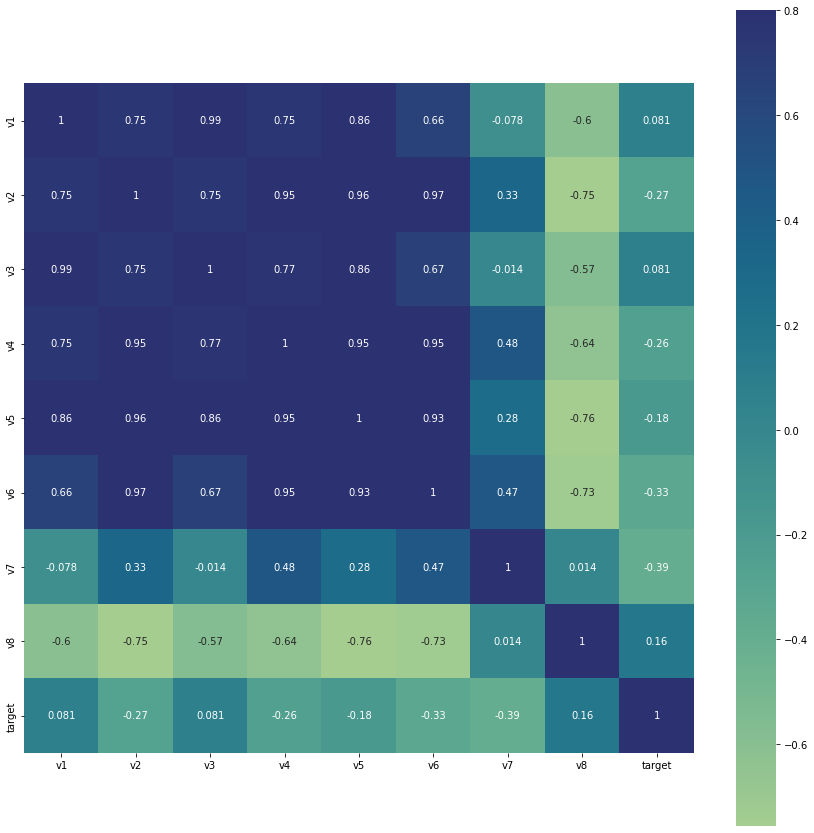

<Figure size 1800x1800 with 0 Axes>

In [19]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(dftrain.corr(method='pearson'), vmax=.8, square=True, annot=True, cmap='crest', annot_kws={"fontsize":10});

plt.figure(figsize=(25,25))
plt.show()

Jika dilihat dari heatmap, v1, v3, v8 memiliki korelasi yang relatif rendah yang sangat memungkinkan untuk didrop. Hanya saja, korelasi antar nutrisi-nutrisi bisa dikatakan relatif tinggi. Sepertinya data ini memiliki multicollinearity tinggi yang akan berpengaruh kepada kestabilan model.

**Oleh karena itu, akan dilakukan pengecekan multicollinearity**

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data[''] = dftrain.columns

vif_data['VIF'] = [variance_inflation_factor(dftrain.values, i)
                        for i in range(len(dftrain.columns))]

print(vif_data)

                   VIF
0      v1   554.102501
1      v2   559.773836
2      v3  1106.339525
3      v4  1672.923069
4      v5  1328.082549
5      v6   764.303589
6      v7  1060.238864
7      v8   543.599371
8  target   377.971260


Dari hasil ini, ditemukan multicollinearity yang sangat tinggi antar fitur. Berdasarkan hal ini, ketimbang melakukan drop, akan dilakukan PCA agar mengamankan informasi-informasi dari setiap feature dan sekaligus mengatasi multicollinearity.

# **Feature Engineering**

## **Feature Scaling**

Scaler yang dipilih adalah robust scaler karena scaler ini cocok untuk data yang memiliki banyak outlier (v2)

In [21]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7
0,-0.095997,-0.537830,-0.301958,-0.876985,-1.078740,-0.501877,-1.336499,-1.196048
1,1.333532,4.685451,1.346537,2.782986,3.369107,3.285645,0.550492,-1.961022
2,-0.025885,0.152839,-0.119549,-0.144379,-0.449041,0.206774,0.081377,0.028620
3,1.127203,3.779232,1.262473,1.741215,2.847108,2.645444,0.383908,-1.933287
4,-0.062944,-0.165931,-0.176674,-0.486193,-0.628830,-0.276397,-0.044039,0.223749
...,...,...,...,...,...,...,...,...
123,-0.041081,-0.442579,-0.193917,-0.434794,-0.607551,-0.274300,-0.309053,-0.344413
124,0.958715,0.162231,0.797749,-0.071296,0.126103,-0.490720,-0.981312,-0.353634
125,-0.110269,-0.589441,-0.199394,-0.437217,-0.932823,-0.429401,-0.416459,-0.864408
126,1.373752,4.966558,1.515862,2.612844,3.450750,3.811261,0.269861,-2.098874


**melakukan dimensionality reduction (PCA) untuk mengatasi multicollinearity**

## **Principal Component Analysis (PCA)**

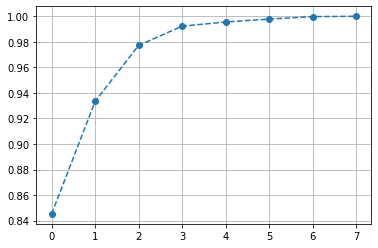

In [22]:
from sklearn.decomposition import PCA   # PCA

pca=PCA()
pca.fit(X_train_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(cumsum,'o--')
plt.grid()
plt.show()

**Melakukan pengecekan elbow untuk menentukan n-componets(jumlah dimensi) terbaik.**

Untuk hal ini, saya menggunakan library `kneed` untuk melihat jumlah dimensi terbaik.

In [23]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from kneed import KneeLocator

kl = KneeLocator(range(0, 8), cumsum, curve="concave", direction="increasing")
print('Elbow:', kl.knee)

Elbow: 2


**Untuk metode kneed, dimensi terbaik adalah 2. Selanjutnya dilakukan pengecekan dimensi terbaik jika ingin melakukan pengamanan informasi data sebanyak 90%**

In [25]:
df_pca=PCA(n_components=0.90).fit_transform(X_train_scaled)
print('Dimension with 90% data information: ',len(pd.DataFrame(df_pca).columns))

Dimension with 90% data information:  2


**Dari sini juga didapatkan jumlah dimensi: 2 merupakan dimensi terbaik. Langkah dilanjutkan melakukan PCA dengan n_component = 2**

In [26]:
df_pca=PCA(n_components=2).fit_transform(X_train_scaled)
print('Dimension: ',len(pd.DataFrame(df_pca).columns))

Dimension:  2


**PCA PIPELINE**

Membuat pipeline untuk mempermudah deployment.

In [27]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('pca', PCA(n_components=2))
])

# **Modeling**

**Proses modeling akan menggunakan AutoML Auto-SkLearn**

Auto-sklearn menggunakan ensambel model (ensemble model) yang terdiri dari kombinasi beberapa algoritma dalam proses prediksinya. Ensambel model adalah teknik pemodelan yang menggabungkan beberapa model yang berbeda untuk menghasilkan prediksi yang lebih akurat daripada hanya menggunakan satu model saja.

Proses otomatisasi pemodelan pada auto-sklearn melibatkan pemilihan dan optimasi model secara otomatis dengan menggunakan algoritma-algoritma machine learning yang berbeda-beda.

Auto-sklearn akan memilih model terbaik dan menggabungkannya dengan model-model yang telah dibangun pada iterasi sebelumnya. Dalam proses ini, auto-sklearn juga akan menentukan bobot (weight) yang diberikan pada setiap model dalam ensambel untuk mengoptimalkan performa prediksi.

Hal ini membuat auto-sklearn menjadi pilihan yang baik untuk menyelesaikan masalah pemodelan yang kompleks dan membutuhkan waktu pemodelan yang lebih cepat.

In [28]:
!pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 53.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 KB 27.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 KB 6.2 MB/s eta 0:00:00
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641945 sha256=79a131bf1b2b49f19614acaf2c29a5b3430a364227246220281bc71c7cef6d24

In [29]:
feature_types = ['Numerical']*8

Model akan diraining dalam waktu 10 menit dengan runtime 1 menit per run untuk mendapatkan kombinasi model terbaik.

In [31]:
import autosklearn.regression

auto_regressor = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=600,
    per_run_time_limit=60,
)
auto_regressor.fit(df_pca, y_train)

AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     per_run_time_limit=60, time_left_for_this_task=600)

In [34]:
print(auto_regressor.leaderboard())

          rank  ensemble_weight                 type      cost  duration
model_id                                                                
119          1             0.02        liblinear_svr  0.599582  0.794153
127          2             0.40  k_nearest_neighbors  0.612051  0.757419
101          3             0.26        liblinear_svr  0.613542  0.789465
32           4             0.02        liblinear_svr  0.663317  0.604442
123          5             0.04        liblinear_svr  0.696836  0.580952
106          6             0.20        liblinear_svr  0.732770  0.847188
124          7             0.06        liblinear_svr  0.762707  0.612964


> **Deskripsi Model**

Kolom "rank" menunjukkan peringkat model berdasarkan performa terbaik hingga yang terburuk. Peringkat teratas adalah model dengan model_id=119 yang menggunakan algoritma "liblinear_svr" dan memiliki cost sebesar 0.599582.

Kolom "ensemble_weight" menunjukkan bobot (weight) yang diberikan pada model ketika digunakan dalam suatu ensemble (gabungan) model. Semakin tinggi bobot, semakin besar kontribusi model pada ensemble. Dalam contoh tersebut, model dengan model_id=127 memiliki bobot tertinggi yaitu 0.4, yang artinya model tersebut memberikan kontribusi terbesar dalam ensemble.

Kolom "type" menunjukkan tipe algoritma yang digunakan untuk membangun model, misalnya "liblinear_svr" dan "k_nearest_neighbors" pada contoh tersebut.

Kolom "cost" menunjukkan nilai cost yang dihasilkan oleh model tersebut pada data yang digunakan untuk pelatihan dan validasi. Semakin kecil nilai cost, semakin baik performa model.

Kolom "duration" menunjukkan waktu yang dibutuhkan oleh auto-sklearn untuk melatih model dalam satuan detik.

Dari hasil tersebut, dapat dilihat bahwa model dengan model_id=119 merupakan model terbaik berdasarkan peringkat dan cost, namun auto-sklearn telah memilih model ensamblenya dengan memberikan bobot tertinggi pada model dengan model_id=127. 

> **Deskripsi Algoritma**

Dapat dilihat bahwa auto-sklearn telah mencoba beberapa algoritma machine learning seperti liblinear_svr dan k_nearest_neighbors untuk membangun model. Model dengan peringkat satu adalah model yang terbaik dari sekumpulan model yang dihasilkan oleh auto-sklearn dengan menggunakan algoritma liblinear_svr. Bobot ensemble yang diberikan pada model ini adalah 0.02. Model kedua terbaik adalah model dengan algoritma k_nearest_neighbors, dengan bobot ensemble sebesar 0.40. Dan seterusnya hingga model terakhir yang memiliki peringkat tujuh dengan algoritma liblinear_svr dan bobot ensemble sebesar 0.06.

# **Combining The Pipeline**

**Membuat pipeline untuk mempermudah proses prediksi dan deployment**

In [35]:
pipeline = Pipeline([
    ('preprocessing', pipe),
    ('model', auto_regressor)
])

# **Model Training**

In [36]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()), ('pca', PCA(n_components=2))])

In [37]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

train_predict = auto_regressor.predict(df_pca)
train_predict2 = pipeline.predict(X_train)
test_predict = pipeline.predict(X_test)

print('------- TRAIN EVALUATION -------')
print('MAE :', mae(y_train, train_predict2))
print('RMSE:', np.sqrt(mse(y_train, train_predict2)))
print(' ')
print('------- TEST EVALUATION -------')
print('MAE :', mae(y_test, test_predict))
print('RMSE:', np.sqrt(mse(y_test, test_predict)))




------- TRAIN EVALUATION -------
MAE : 0.1412515141093172
RMSE: 0.17267058618207307
 
------- TEST EVALUATION -------
MAE : 0.15514621755108235
RMSE: 0.2046173530646719


**Evaluasi performa model machine learning pada data training dan data testing dengan menggunakan metrik MAE (Mean Absolute Error) dan RMSE (Root Mean Squared Error).**

Pada evaluasi training, MAE didapatkan dengan nilai **0.14**. Nilai ini menunjukkan rata-rata kesalahan prediksi model dalam satuan asli dari data yang diprediksi. Semakin kecil nilai MAE, semakin baik performa model dalam memprediksi nilai target. Sedangkan RMSE pada evaluasi training didapatkan dengan nilai **0.17**, yang menunjukkan akar dari rata-rata kuadrat selisih antara nilai target dan prediksi model. Semakin kecil nilai RMSE, semakin baik performa model.

Pada evaluasi testing, MAE didapatkan dengan nilai **0.15**. Nilai ini menunjukkan rata-rata kesalahan prediksi model pada data testing. Semakin dekat nilai MAE pada data training dan testing, semakin baik performa model. Sedangkan RMSE pada evaluasi testing didapatkan dengan nilai **0.20**. Nilai ini menunjukkan akar dari rata-rata kuadrat selisih antara nilai target dan prediksi model pada data testing. Semakin kecil nilai RMSE pada data testing, semakin baik performa model dalam memprediksi nilai target pada data testing.



Dari evaluasi, terlihat model sedikit overfit, namun masih bisa ditoleransi. Dilanjutkan ke deployment.

# **Saving The Full Model**

**Melakukan saving model**

In [38]:
import pickle

# Save the pipeline and the model
with open('pipeline_and_model.pkl', 'wb') as f:
    pickle.dump((pipeline), f)

# **Kesimpulan**

Untuk meningkatkan kualitas model, ada beberapa hal yang perlu ditingkatkan

1. Menambah jumlah data training: Semakin banyak data yang digunakan untuk melatih model, semakin akurat pula model dalam melakukan prediksi.
2. Meningkatkan kualitas data: Kualitas data sangat penting dalam pembuatan model prediksi yang akurat. Oleh karena itu, perlu dilakukan pembersihan data atau preprocessing data untuk meminimalkan missing value, outliers, dan data yang tidak konsisten.
3. Mencoba algoritma lain dapat menjadi pilihan untuk meningkatkan performa model. Dengan mencoba algoritma lain, kita dapat menemukan model yang lebih baik untuk masalah yang dihadapi. Selain itu, dapat juga dilakukan tuning parameter pada algoritma yang digunakan untuk meningkatkan performa model.

# **Contact**

Linkedin: http://linkedin.com/in/hasbithaufik/ <br>
Github: http://github.com/hasbithaufik <br>
Gmail: hasbithaufik@gmail.com <br>
Telepon: +6281374160173